<p style="font-family: Calibri; font-size:3.75em;color:dodgerblue; font-style:bold"><br>
Female participation in the economy<br><br> and a country's wealth</p><br>

Diversity is a hot topic. Research shows that diversity in teams leads to better decision making ([for example refer to this article at Forbes](https://www.forbes.com/sites/eriklarson/2017/09/21/new-research-diversity-inclusion-better-decision-making-at-work/#3ee9eabb4cbf)) and that companies with a more diverse board grow their revenues faster ([an example on gender diverse boards](http://www.smh.com.au/business/workplace-relations/asx-300-companies-with-gender-diverse-boards-grow-revenue-faster-kpmg-report-20170330-gva4kz.html)). 
An important component of diversity is gender diversity: equal representation by man and women in teams. Following the line of thought provided by the research on diversity, I will examine if the participation of women in the economy can be used to predict GDP. My expectation is that the higher the participation of women in the economy, the higher the country's GDP is. 

To investigate this, I will use observations from the following datasets, all downloadable from [Worldbank Data Catalog](https://data.worldbank.org/data-catalog):
* World Development Indicators [September 2017] --> will be used to source the value of GDP per capita per country
* Education Statistics [June 2017] --> will be used to source data on female educational attainment per country
* Gender Statistics [October 2017] --> will be used to source data on female economic participation per country<br>

To ensure the availability of enough intersecting data points, the year 2010 has been selected. 

<p style="font-family: Calibri; font-size:2.00em;color:seagreen; font-style:bold">
Import libraries</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

<p style="font-family: Calibri; font-size:2.00em;color:seagreen; font-style:bold">
Ingest the datasets</p>

In [2]:
# World Development Indicators (WDI)
wdi_raw = pd.read_csv('./World_Bank_Data/wdi_csv/wdidata.csv')
wdi_raw.shape

(409992, 63)

In [3]:
# Education Statistics (EdStats)
edstats_raw = pd.read_csv('./World_Bank_Data/edstats_csv/edstatsdata.csv')
edstats_raw.shape

(886930, 70)

In [4]:
# Gender Statistics (GenderStats)
genderstats_raw = pd.read_csv('./World_Bank_Data/gender_stats_csv/gender_statsdata.csv')
genderstats_raw.shape

(165690, 63)

<p style="font-family: Calibri; font-size:2.00em;color:seagreen; font-style:bold">
Clean the data and create the dataset which will be used for the regression analysis</p>
Based on my initial data exploration the year 2010 is selected.
<p style="font-family: Calibri; font-size:1.50em;color:hotpink; font-style:bold">
World Development Indicators dataset cleaning</p>
For my analysis I will use the following indicator:
*GDP per capita (constant 2010 US$)*
and only keep data for the year 2010. 
Gross Domestic Product (GDP) is a measure of the economic output of a country. GDP per capita scales this measure to ensure comparability across countries.

In [5]:
# Create a mask that filters for the selected indicator
gdp_per_capita = wdi_raw["Indicator Name"] == "GDP per capita (constant 2010 US$)"

len(wdi_raw[gdp_per_capita]["Country Code"].unique())

264

In [6]:
# Create a copy of the dataset that only includes rows with GDP per capita
wdi_gdp = wdi_raw[gdp_per_capita].copy()
wdi_gdp.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
382553,Turkmenistan,TKM,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4129.543531,4439.203000,5006.296232,5462.980549,5909.771043,6399.270662,6693.935610,6986.855946,NaN,NaN
56423,Pacific island small states,PSS,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2845.117296,2891.657505,2968.424575,2993.793730,3057.157126,3132.872748,3218.961249,3270.773956,NaN,NaN
343728,Solomon Islands,SLB,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1217.377773,1272.448025,1405.469626,1439.189608,1451.048353,1442.232554,1465.588478,1479.343203,NaN,NaN
112331,Botswana,BWA,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,390.829725,405.798638,422.172033,435.689893,453.078975,466.262180,...,5948.853248,6346.156204,6610.331923,6779.393898,7409.421155,7574.282093,7308.611508,7383.325186,NaN,NaN
221041,Italy,ITA,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,10867.703476,11681.305276,12322.314307,12918.967233,13171.601863,13487.989818,...,35363.400937,35849.373636,35994.134608,34885.295970,33887.298464,33615.971505,33911.933836,34283.704985,NaN,NaN


In [7]:
wdi_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [8]:
# Drop columns that are not needed - only keep data for the year 2010

keep_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2010"]

for name in wdi_gdp.columns:
    if name not in keep_columns:
        wdi_gdp.drop(name, 1, inplace=True)

wdi_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010'],
      dtype='object')

In [9]:
# Drop rows with NaN values
wdi_gdp.dropna(axis=0, inplace=True)
wdi_gdp.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
308009,Papua New Guinea,PNG,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1366.879112
256760,Madagascar,MDG,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,412.730934
50211,North America,NAC,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,48289.700300
207064,Hungary,HUN,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,13025.533794
314221,Poland,POL,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,12599.524864


In [10]:
# Count the number of observations
wdi_gdp.shape

(249, 5)

In [11]:
# Check the number of unique countries in the analysis
len(wdi_gdp["Country Name"].unique())

249

<p style="font-family: Calibri; font-size:1.50em;color:hotpink; font-style:bold">Education statistics dataset cleaning</p>
I have selected the following indicators for my analysis: 
* *Barro-Lee: Average years of tertiary schooling, age 15+, female (BAR.TER.SCHL.15UP.FE)* and 
* *UIS: Percentage of population age 25+ with a completed bachelor's or equivalent degree (ISCED 6). Female (UIS.EA.6.AG25T99.F)*<br>

Education is important. On average, the higher someones education, the more they will earn and therefore the more they can contribute to a country's GDP.

In [12]:
# Create a mask that filters for the selected indicators
female_attainment = (edstats_raw["Indicator Code"] == "BAR.TER.SCHL.15UP.FE") | (edstats_raw["Indicator Code"] == "UIS.EA.6.AG25T99.F")

edstats_raw[female_attainment]["Indicator Code"].unique()

array(['BAR.TER.SCHL.15UP.FE', 'UIS.EA.6.AG25T99.F'], dtype=object)

In [13]:
# Create a copy of the dataset that only contains these indicators
fem_att_df = edstats_raw[female_attainment].copy()
fem_att_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
395353,Guyana,GUY,UIS: Percentage of population age 25+ with a c...,UIS.EA.6.AG25T99.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652579,Peru,PER,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,0.11,NaN,NaN,NaN,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461323,Kenya,KEN,UIS: Percentage of population age 25+ with a c...,UIS.EA.6.AG25T99.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154139,Belarus,BLR,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821169,Turkmenistan,TKM,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop columns that are not needed - only keep data for the year 2010

keep_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2010"]

for name in fem_att_df.columns:
    if name not in keep_columns:
        fem_att_df.drop(name, 1, inplace=True)

fem_att_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010'],
      dtype='object')

In [15]:
fem_att_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
14869,Europe & Central Asia,ECS,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,NaN
29529,High income,HIC,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,NaN
593939,Nauru,NRU,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,NaN
678234,Russian Federation,RUS,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,1.64
549283,Marshall Islands,MHL,UIS: Percentage of population age 25+ with a c...,UIS.EA.6.AG25T99.F,NaN


In [16]:
# Drop rows with NaN values
fem_att_df.dropna(axis=0, inplace=True)
fem_att_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
850489,Uruguay,URY,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,0.27000
418019,Indonesia,IDN,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,0.19000
677558,Romania,ROU,UIS: Percentage of population age 25+ with a c...,UIS.EA.6.AG25T99.F,11.32334
146133,Bahrain,BHR,UIS: Percentage of population age 25+ with a c...,UIS.EA.6.AG25T99.F,9.98245
248753,Colombia,COL,UIS: Percentage of population age 25+ with a c...,UIS.EA.6.AG25T99.F,9.64078


In [17]:
# Count the number of observations
fem_att_df.shape

(212, 5)

In [18]:
# Check the number of unique countries in the dataframe
len(fem_att_df["Country Name"].unique())

150

<p style="font-family: Calibri; font-size:1.50em;color:hotpink; font-style:bold">
Gender statistics dataset cleaning</p>
From the gender statistics dataset, I will use the following indicators:
* *Firms with female top manager (% of firms) (IC.FRM.FEMM.ZS)*
* *Female share of employment in senior and middle management (%) (SL.EMP.SMGT.FE.ZS)*
* *Women who own a house both alone and jointly (% of women age 15-49) (SG.OWN.HSAJ.FE.ZS)*
* *Employment to population ratio, 15+, female (%) (national estimate) (SL.EMP.TOTL.SP.FE.NE.ZS)*<br>

All indicators are selected as measures of female participation in the economy.
Also in this case, I will only keep data for the year 2010.

In [19]:
# Create a mask that filters for the selected indicators
female_participation = (genderstats_raw["Indicator Code"] == "IC.FRM.FEMM.ZS") | (genderstats_raw["Indicator Code"] == "SL.EMP.SMGT.FE.ZS") | (genderstats_raw["Indicator Code"] == "SG.OWN.HSAJ.FE.ZS") | (genderstats_raw["Indicator Code"] == "SL.EMP.TOTL.SP.FE.NE.ZS")

genderstats_raw[female_participation]["Indicator Code"].unique()

array(['SL.EMP.TOTL.SP.FE.NE.ZS', 'SL.EMP.SMGT.FE.ZS', 'IC.FRM.FEMM.ZS',
       'SG.OWN.HSAJ.FE.ZS'], dtype=object)

In [20]:
# Create a copy of the dataset that only contains the selected indicators
fem_part_df = genderstats_raw[female_participation].copy()
fem_part_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
119872,Nigeria,NGA,Female share of employment in senior and middl...,SL.EMP.SMGT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140012,South Africa,ZAF,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.200001,34.349998,34.590000,34.869999,36.939999,NaN,34.529999,NaN,NaN,NaN
118408,New Zealand,NZL,Women who own a house both alone and jointly (...,SG.OWN.HSAJ.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102232,"Macao SAR, China",MAC,Female share of employment in senior and middl...,SL.EMP.SMGT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32.529999,32.799999,NaN,NaN,NaN
140032,South Africa,ZAF,Female share of employment in senior and middl...,SL.EMP.SMGT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.750000,NaN,NaN,NaN
146965,Sweden,SWE,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.500000,NaN,NaN,NaN,NaN
21592,Other small states,OSS,Female share of employment in senior and middl...,SL.EMP.SMGT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90872,Jordan,JOR,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.300000,11.500000,NaN,NaN,10.300000,10.000000,NaN,NaN,NaN,NaN
138142,Slovenia,SVN,Female share of employment in senior and middl...,SL.EMP.SMGT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.689999,43.250000,38.919998,40.259998,38.549999,36.470001,36.980000,NaN,NaN,NaN
75775,Gibraltar,GIB,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Drop columns that are not needed - only keep data for 2010
# Also drop "Indicator code"

keep_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2010"]

for name in fem_part_df.columns:
    if name not in keep_columns:
        fem_part_df.drop(name, 1, inplace=True)

fem_part_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010'],
      dtype='object')

In [22]:
# Drop rows with NaN values
fem_part_df.dropna(axis=0, inplace=True)
fem_part_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
83332,Hungary,HUN,Female share of employment in senior and middl...,SL.EMP.SMGT.FE.ZS,39.959999
117962,New Zealand,NZL,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,57.680000
102212,"Macao SAR, China",MAC,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,64.709999
36692,Azerbaijan,AZE,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,57.680000
39235,Barbados,BRB,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,25.400000


In [23]:
# Check the number of observations
fem_part_df.shape

(228, 5)

In [24]:
# Check number of unique countries in df
len(fem_part_df['Country Name'].unique())

156

<p style="font-family: Calibri; font-size:2.00em;color:seagreen; font-style:bold">Merge the datasets</p>

The first step is to only select countries that occur in all three datasets.

In [25]:
print("The World Development Indicators: " + str(len(wdi_gdp["Country Name"].unique())) + " countries")
print("The Education Stats dataset: " + str(len(fem_att_df["Country Name"].unique())) + " countries")
print("The Gender Stats dataset: " + str(len(fem_part_df['Country Name'].unique())) + " countries")

The World Development Indicators: 249 countries
The Education Stats dataset: 150 countries
The Gender Stats dataset: 156 countries


To ensure that only countries are included in the final dataset that have observations across all three datasets, I will remove country observations that only occur in either one or two of the datasets.

In [26]:
set1 = wdi_gdp["Country Code"]
set2 = fem_att_df["Country Code"]
set3 = fem_part_df["Country Code"]

countries = list(set(set(set1).intersection(set2)).intersection(set3))
print(sorted(countries))

['ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BWA', 'CAN', 'CHE', 'CHL', 'CMR', 'COD', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GAB', 'GBR', 'GHA', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LBR', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDV', 'MEX', 'MLI', 'MLT', 'MUS', 'MYS', 'NIC', 'NLD', 'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SGP', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TTO', 'TUN', 'TUR', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF']


All dataframes have the same number of columns, which are also named identically. Therefore, they can be easily concatenated.

In [27]:
frames = [wdi_gdp, fem_att_df, fem_part_df]
research_df = pd.concat(frames)
research_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
100952,Lithuania,LTU,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,44.900002
51182,Canada,CAN,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,57.900002
626924,Norway,NOR,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,0.820000
615929,Niger,NER,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,0.020000
83312,Hungary,HUN,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,39.110001


In [28]:
# Remove countries not in the 'countries' list

research_df = research_df[research_df["Country Code"].isin(countries)]
research_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
659909,Poland,POL,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,0.670000
121742,Oman,OMN,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,23.840000
96801,Bangladesh,BGD,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,757.671757
381000,Turkey,TUR,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,10672.056926
43645,Bolivia,BOL,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,21.700000


In [29]:
research_df["Country Code"].unique()

array(['ALB', 'DZA', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR',
       'BGD', 'BRB', 'BEL', 'BLZ', 'BEN', 'BMU', 'BOL', 'BIH', 'BWA',
       'BRA', 'BGR', 'BDI', 'KHM', 'CMR', 'CAN', 'CHL', 'COL', 'COD',
       'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV',
       'EST', 'FIN', 'FRA', 'GAB', 'DEU', 'GHA', 'GRC', 'GTM', 'GUY',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KOR', 'KWT', 'KGZ', 'LVA', 'LBR',
       'LTU', 'LUX', 'MAC', 'MYS', 'MDV', 'MLI', 'MLT', 'MUS', 'MEX',
       'MDA', 'MAR', 'NLD', 'NZL', 'NIC', 'NOR', 'OMN', 'PAK', 'PAN',
       'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA',
       'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'SWE', 'CHE',
       'THA', 'TTO', 'TUN', 'TUR', 'UKR', 'GBR', 'USA', 'URY', 'VEN',
       'VNM', 'PSE', 'YEM'], dtype=object)

In [30]:
research_df[research_df["Country Code"] == "ALB"]

,Country Name,Country Code,Indicator Name,Indicator Code,2010
75059,Albania,ALB,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,4094.358832
95499,Albania,ALB,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.15UP.FE,0.060000
29762,Albania,ALB,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,44.400002


Lastly, before I can start the regression analysis, I want to reshape my dataframe so that every indicator has its own column.

In [31]:
research_df = research_df.pivot(index="Country Code", columns="Indicator Code", values="2010")

In [32]:
research_df.shape

(111, 7)

In [33]:
research_df.isnull().sum(axis=0)

Indicator Code
BAR.TER.SCHL.15UP.FE         6
IC.FRM.FEMM.ZS              84
NY.GDP.PCAP.KD               0
SG.OWN.HSAJ.FE.ZS          108
SL.EMP.SMGT.FE.ZS           65
SL.EMP.TOTL.SP.FE.NE.ZS      8
UIS.EA.6.AG25T99.F          47
dtype: int64

Due to the large number of NaN numbers in some of the columns for the countries selected, I will have to drop the following columns, as otherwise my number of observations would become too low:
- Firms with female top manager (% of firms) (IC.FRM.FEMM.ZS)  
- Women who own a house both alone and jointly (% of women age 15-49) (SG.OWN.HSAJ.FE.ZS)
- Female share of employment in senior and middle management (%) (SL.EMP.SMGT.FE.ZS)
- UIS: Percentage of population age 25+ with a completed bachelor's or equivalent degree (ISCED 6). Female (UIS.EA.6.AG25T99.F)

In [34]:
research_df.drop(["IC.FRM.FEMM.ZS", "SG.OWN.HSAJ.FE.ZS", "SL.EMP.SMGT.FE.ZS", "UIS.EA.6.AG25T99.F"], axis=1, inplace=True)

In [35]:
research_df.dropna(axis=0, inplace=True)
research_df.sample(10)

Indicator Code,BAR.TER.SCHL.15UP.FE,NY.GDP.PCAP.KD,SL.EMP.TOTL.SP.FE.NE.ZS
Country Code,,,
DNK,0.82,58041.411225,55.939999
NOR,0.82,87646.753463,66.620003
URY,0.27,11938.212005,48.919998
BGD,0.10,757.671757,33.939999
MEX,0.51,8959.581416,40.310001
LVA,0.68,11326.219475,45.130001
BHR,0.35,20722.103890,42.080002
CAN,1.39,47447.476024,57.900002
HND,0.11,1932.858290,41.009998


In [36]:
research_df.shape

(98, 3)

<p style="font-family: Calibri; font-size:2.00em;color:seagreen; font-style:bold">Visualise the data</p>
The remaining columns in the merged dataset are:
* Country Code
* Average years of tertiary schooling, 15+, female is the average years of tertiary education completed among females over age 15 (BAR.TER.SCHL.15UP.FE)
* Employment to population ratio, 15+, female (%) (national estimate) (SL.EMP.TOTL.SP.FE.NE.ZS)
* GDP per capita (constant 2010 US$) (NY.GDP.PCAP.KD)
I will use the first two indicators to predict the GDP.

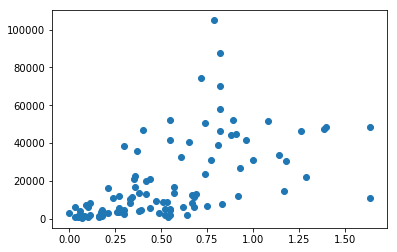

In [37]:
# Visualise the relationship between the average years of tertiary school and GDP,
# and between employment to population ratio and GDP

plt.scatter(research_df["BAR.TER.SCHL.15UP.FE"], research_df["NY.GDP.PCAP.KD"])
plt.savefig("Scatterplot average years tertiary school vs GDP.png", transparant=True)
plt.show()

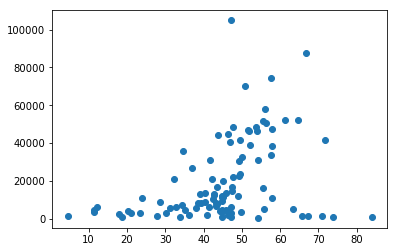

In [38]:
plt.scatter(research_df["SL.EMP.TOTL.SP.FE.NE.ZS"], research_df["NY.GDP.PCAP.KD"])
plt.savefig("Scatterplot female employment vs GDP.png", transparant=True)
plt.show()

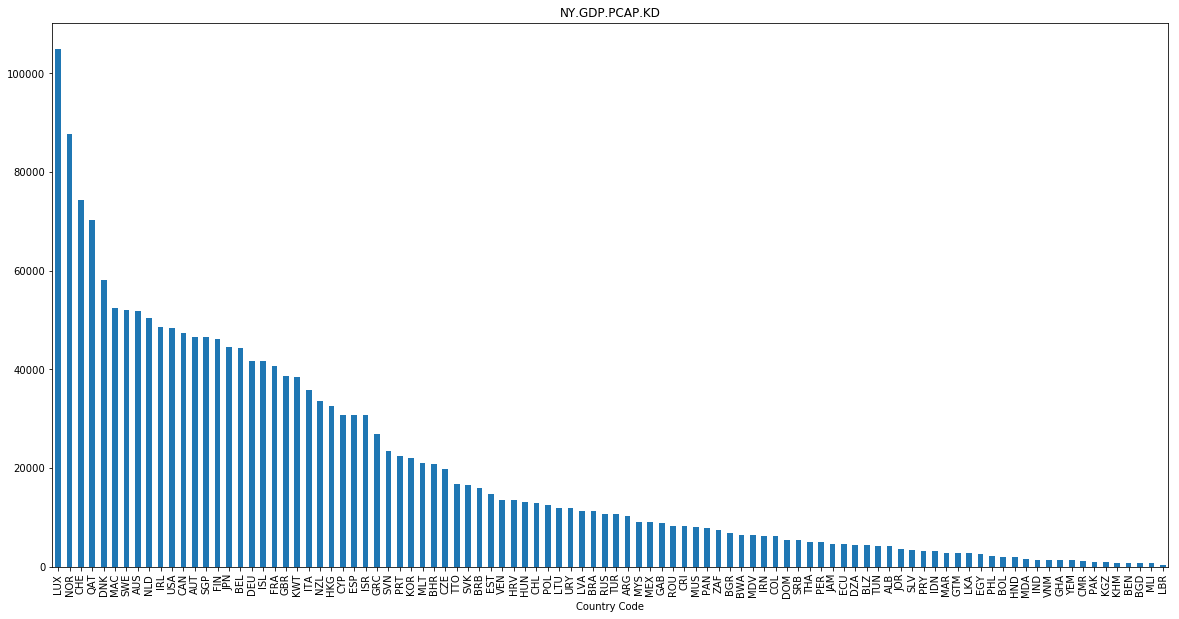

In [39]:
# Visualise GDP per capita per country
GDP_per_capita = research_df["NY.GDP.PCAP.KD"].sort_values(ascending=False)
GDP_per_capita.plot.bar(figsize=(20,10), subplots=True)
plt.style.use('seaborn-pastel')
plt.savefig("GDP_per_capita_per_country.png", transparant=True)
plt.show()

<p style="font-family: Calibri; font-size:2.00em;color:seagreen; font-style:bold">The Regression Analysis</p>
Based on the cleaned and merged dataset I will now conduct a regression analysis. First, I will split the dataframe in a target and independent variables. Then I will split the dataset into a training and a test set.

In [40]:
# Split the dataframe in a target ('Y') and independent variables ('X')
X = research_df[["BAR.TER.SCHL.15UP.FE", "SL.EMP.TOTL.SP.FE.NE.ZS"]]
Y = research_df["NY.GDP.PCAP.KD"]

In [41]:
# Create a training and a test subset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [42]:
# Describe Y_test
Y_test.describe()

count       33.000000
mean     10440.814981
std      11476.373437
min        708.370763
25%       2602.479549
50%       6250.655044
75%      13505.745863
max      41785.556913
Name: NY.GDP.PCAP.KD, dtype: float64

In [43]:
# Fit a regression model to the training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# Use the trained model to predict GDP
Y_prediction = regressor.predict(X_test)
Y_prediction

array([ 27870.27805002,   3833.15525449,  19295.86561819,  39739.32848399,
         3531.00526076,   1640.13356811,  11964.68879519,  25935.58459064,
        -4124.6428334 ,  24223.94997937,  22654.47380313,   5349.380696  ,
        27699.54990462,  26473.55232792,  29244.93898784,  21043.16183592,
        33904.05081789,  20861.00972969,  30548.19344724,  18939.46739332,
        29670.49890179,  21105.32623193,  12621.4825357 ,  17875.37426286,
        43012.69517404,    541.87565592,  16711.20364397,  39778.9960545 ,
         8356.67854226,  34560.07855966,    557.03658993,  25095.96502773,
        10960.66814444])

In [45]:
# Compare the mean of Y_prediction with the mean of Y_test
print(Y_prediction.mean())
print(Y_test.mean())

19741.6668193
10440.814980790017


In [46]:
# Evaluate the model by using the Root Mean Square Error
RMSE = sqrt(mean_squared_error(y_true = Y_test, y_pred = Y_prediction))
print(RMSE)

15046.334735932869


The mean of the predicted GDP values is almost twice as much as the mean of the actual GDP values, and the RMSE is 1.5 times the mean of the actual GDP values. It seems that the used indicators cannot be used as indicators of a country's GDP.

In [47]:
# Create a dataframe to compare the predicted and actual value
comparison = pd.DataFrame(Y_test)
comparison['Prediction'] = pd.Series(Y_prediction, index=comparison.index)
comparison.sort_values(by="NY.GDP.PCAP.KD", ascending=False, inplace=True)
comparison

,NY.GDP.PCAP.KD,Prediction
Country Code,,
DEU,41785.556913,25935.584591
GBR,38709.911662,33904.050818
CYP,30818.463957,39739.328484
ESP,30736.002278,26473.552328
SVN,23437.472021,30548.193447
PRT,22538.654077,21043.161836
KOR,22086.952919,43012.695174
EST,14638.604817,39778.996054
HRV,13505.745863,20861.009730


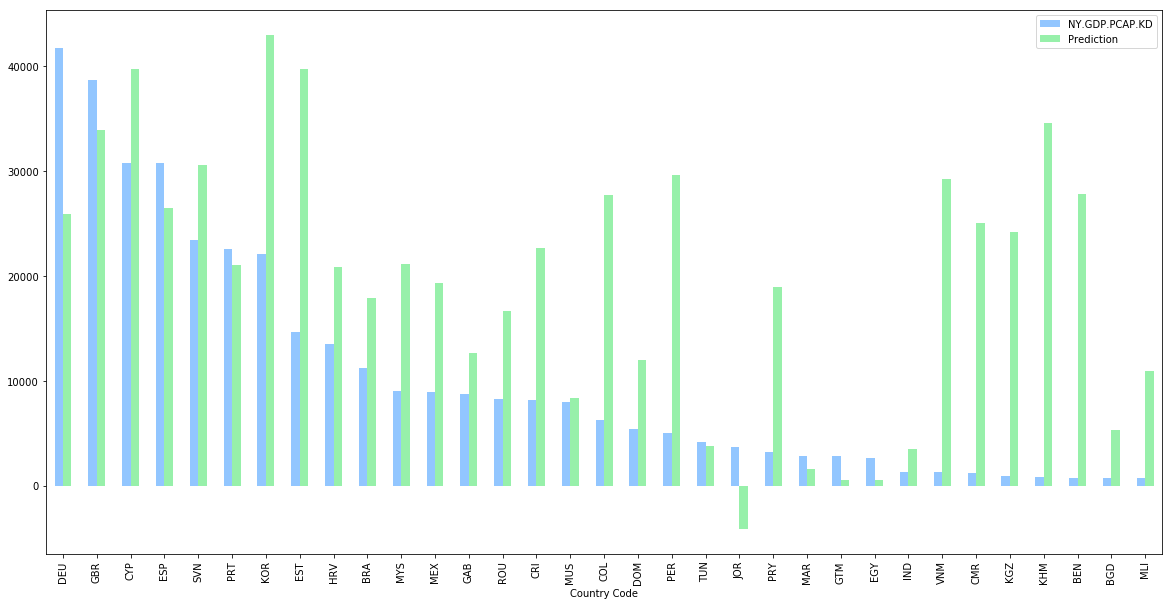

In [48]:
# Plot the actual and predicted values
comparison.plot.bar(figsize=(20,10), subplots=False)
plt.style.use('seaborn-pastel')
plt.savefig("Comparison of predicted vs actual values GDP.png", transparant=True)
plt.show()